## TIME SERIES ANALYSIS OF PROPERTY PRICE INDEX LONDON

### Objective 
To forecast changes in the property price index based on historical movements and use the outcome to complete sensitivity (vulnerability) analysis on the properties held as collateral (security) on the mortgage book for UBS Wealth Management UK to the price changes. 

### Backgroung and context
UBS Wealth Management offer mainly interest only mortgages to their client and with a bullet payment expected at the end of the loan term. Fall in property price exposes the Bank to the credit losses in the event that client default on their payments and there is a short-fall in the property collateral value.

Majority (over 95%) of mortgage lending provided to clients is mainly for purchasing properties in London prime location.

I work in Group Internal Audit and as part of my job, I assess whether the credit risk team are adequately taking into account the property prices movement in thier sensetivity analysis of the credit book exposure.

### Overview and action plan
As the objective is to analyse the historical pattern of data points taken over time to forecast the future, I will use the time series model to forecast potential movement in the property price index which directly impacts the underlying property prices.

The initial plan for this project is as follows:
1. Source the data
2. Explore the data
3. Clean the data
4. Prepare the data for analysis
5. Create a time series model to forecast movement in the property price index
6. Evaluate the model
7. Improve the model

### 2. Source the data
#### UK House Price Index
The UK House Price Index (UK HPI) is jointly produced by the Office for National Statistics (ONS) and Land Registry and captures changes in the value of residential properties. The main sources of price paid data used in the UK HPI are HM Land Registry for England and Wales, Registers of Scotland and Her Majesty’s Revenue and Customs Stamp Duty Land Tax data for the Northern Ireland House Price Index. The UK HPI is published under Open Government Licence and is available for download on the following website https://www.gov.uk/government/collections/uk-house-price-index-reports. Further details on how the index is compiled are explained on the following gov.uk website https://www.gov.uk/government/publications/about-the-uk-house-price-index

###  3. Explore the data

In [1]:
# Importing necessary packages for data exploration and analysis
import pandas as pd # package for manipulating data and data frames
import numpy as np # package for analysis and computing data in multi-dimensional array
import matplotlib.pyplot as plt # package for visualising data
import matplotlib.dates as mdates

import seaborn as sns # package for visualising data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller # for testing stationarity
import statsmodels.api as sm # module for estimating and inferring for statistical models, conduct statistical tests, and statistical data exploration.
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set command to show graphs in the notebook
%matplotlib inline

In [3]:
# Loading the data from a .xls file into a data frame (data is in the fourth tab of excel)
Index = pd.read_excel('UK_House_price_index.xls',3) 

In [4]:
Index # to view the data

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,11.6694,22.9292,20.2185,24.8167,16.8596,21.9043,15.7112,23.9452,19.3718,...,32.3127,32.9029,29.6381,24.839,31.2547,18.4774,24.1719,25.6979,NaN,26.2269
2,1995-02-01,10.4895,23.2134,20.198,24.7517,17.0288,21.9006,15.5262,23.8735,19.617,...,32.2884,32.7012,29.968,24.7917,31.6379,18.0659,24.0572,25.534,NaN,26.1744
3,1995-03-01,10.0962,23.2966,19.9937,24.5911,17.0273,21.8447,15.6267,23.7908,19.734,...,32.6629,33.1945,29.5335,24.6067,31.8207,18.3436,24.2077,25.1708,NaN,26.2262
4,1995-04-01,9.83852,24.1439,19.6719,24.5568,17.2518,21.7576,15.6027,23.7554,19.9302,...,32.54,33.4984,30.0153,24.7805,31.9107,18.4823,24.4001,25.7359,NaN,26.4182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2019-10-01,105.577,138.394,114.002,127.546,116.965,117.94,104.711,126.048,116.047,...,122.528,122.381,126.725,127.615,130.445,117.622,122.045,121.557,NaN,122.829
299,2019-11-01,99.3879,139.218,113.286,127.619,102.262,117.308,106.763,127.169,115.336,...,121.944,120.759,126.833,126.609,130.33,116.361,121.938,120.742,NaN,122.279
300,2019-12-01,94.3826,136.972,112.496,128.587,101.649,118.057,104.293,127.984,113.517,...,121.81,121.918,126.938,127.774,130.012,119.054,121.803,120.816,NaN,122.685
301,2020-01-01,95.5071,137.97,112.33,128.172,100.63,116.976,104.029,128.698,113.291,...,120.893,120.463,127.048,126.612,130.5,118.221,121.789,120.615,NaN,122.183


From the above, I can note that the first column contains the date, subsequent columns contains information about price indices for different boroughs in the UK. There are some unnamed columns which seem to be blank as these do not contain any values. 

In [5]:
list(Index) # to view and study the different boroughs

['Unnamed: 0',
 'City of London',
 'Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster',
 'Unnamed: 34',
 'Inner London',
 'Outer London',
 'Unnamed: 37',
 'NORTH EAST',
 'NORTH WEST',
 'YORKS & THE HUMBER',
 'EAST MIDLANDS',
 'WEST MIDLANDS',
 'EAST OF ENGLAND',
 'LONDON',
 'SOUTH EAST',
 'SOUTH WEST',
 'Unnamed: 47',
 'England']

In [6]:
# filtering the unnamed columns to review their contents
Index_unnamed_columns= Index.filter(items=['Unnamed: 0','Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'])
Index_unnamed_columns.head()

,Unnamed: 0,Unnamed: 34,Unnamed: 37,Unnamed: 47
0,NaT,NaN,NaN,NaN
1,1995-01-01,NaN,NaN,NaN
2,1995-02-01,NaN,NaN,NaN
3,1995-03-01,NaN,NaN,NaN
4,1995-04-01,NaN,NaN,NaN


### 4. Cleaning the data

I will drop the unnamed columns without data, raname the first column head to month and drop the first row as it does not contain meaningful data.

In [7]:
# Rename second colum and change
Index = Index.rename({'Unnamed: 0': 'Month'}, axis=1)
#Dropping unnamed columns 
Index = Index.loc[:, ~Index.columns.str.contains('^Unnamed')] # or Index = Index.drop(['Unnamed: 47','Unnamed: 34', 'Unnamed: 37'], axis = 1) 
#Dropping the first row as it is blank or has data which is not of interest 
Index = Index.drop(Index.index[0])

In [8]:
Index.dtypes

Month                   datetime64[ns]
City of London                  object
Barking & Dagenham              object
Barnet                          object
Bexley                          object
Brent                           object
Bromley                         object
Camden                          object
Croydon                         object
Ealing                          object
Enfield                         object
Greenwich                       object
Hackney                         object
Hammersmith & Fulham            object
Haringey                        object
Harrow                          object
Havering                        object
Hillingdon                      object
Hounslow                        object
Islington                       object
Kensington & Chelsea            object
Kingston upon Thames            object
Lambeth                         object
Lewisham                        object
Merton                          object
Newham                   

### 4. Prepare the data for analysis
During this step I will adust the data nto formats appropriate to complete the time series analysis as follows:

In [9]:
# defining the starting point as I will be doing the time series over a 20 year period
Index=Index[Index['Month'] > '2000-02-01']

In [10]:
# Converting date to a format understood in the series.
Index['Month'] = pd.to_datetime(Index['Month'], unit='s')
#Index['Month'] = mdates.date2num(Index.Month.dt.to_pydatetime())

In [11]:
# Making the month an index
Index.set_index('Month', inplace=True)
Index.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Month,,,,,,,,,,,,,,,,,,,,,
2000-03-01,22.7569,33.4546,34.6651,37.5572,31.7059,37.8414,29.9511,38.7401,35.5161,36.8191,...,41.5499,38.5318,37.2587,38.5424,37.6391,40.1212,33.3342,40.6893,39.56,37.9658
2000-04-01,23.3646,33.5349,35.3259,37.9664,32.4538,38.764,31.1357,39.7086,36.3013,37.4026,...,42.2201,39.4086,38.5607,39.6234,39.078,40.7906,34.919,42.2683,40.8272,39.2571
2000-05-01,22.3361,34.1373,35.9219,38.691,33.1279,39.5745,32.3252,40.7979,37.1824,38.2626,...,42.4905,39.3923,38.9072,39.9759,39.9392,41.5819,34.9665,42.7035,41.4043,39.6083
2000-06-01,25.2902,34.9613,36.6345,39.2181,33.7289,40.3446,34.0087,41.5913,37.6326,38.8781,...,41.8273,39.292,39.3741,40.6233,40.1238,42.2867,35.6318,43.6626,41.999,40.0625
2000-07-01,27.4163,35.838,36.9587,39.9334,33.9767,40.6157,34.382,41.9762,38.0468,39.4966,...,43.033,39.9139,39.7042,41.3056,41.0821,42.6776,36.2987,44.0241,42.8479,40.7003


In [12]:
Index.describe(include='all')

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000
unique,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000
top,56.786365,112.216704,56.323821,72.123709,56.879244,56.626323,56.370957,76.873883,56.175194,59.505166,...,56.377499,56.570641,56.809853,112.756639,76.892635,112.123751,56.430869,112.408097,112.19069,112.607038
freq,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


As the bank mainly provides lending in London Prime locations, I will focus the analysis on the property price index for Inner London as this will be more representative of the properties on which the provide lending.

In [13]:
Property_Index= Index.filter(items=['Inner London'], axis = 1) 

In [14]:
Property_Index.head()

,Inner London
Month,
2000-03-01,29.3589
2000-04-01,30.3703
2000-05-01,30.799
2000-06-01,31.5792
2000-07-01,31.9673


In [15]:
# multipling the index by 10,000 so as to convert the number into intergers which are easier to work with.
Property_Index['Inner London'] = Property_Index ['Inner London'] * 10000
Property_Index1=Property_Index.dropna()

In [16]:
#Property_Index1['Inner London'] = Property_Index['Inner London'].astype(int)
Property_Index1= Property_Index.astype(int)

In [17]:
print(Property_Index1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2000-03-01 to 2020-02-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Inner London  240 non-null    int32
dtypes: int32(1)
memory usage: 2.8 KB
None


In [18]:
Property_Index1.head()

,Inner London
Month,
2000-03-01,293588
2000-04-01,303702
2000-05-01,307989
2000-06-01,315791
2000-07-01,319673


In [19]:
Property_Index.describe()

,Inner London
count,240.0000
unique,240.0000
top,651775.0748
freq,1.0000


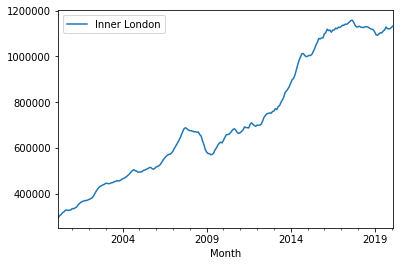

In [20]:
Property_Index.plot()

### Finding ARIMA(p,d,q)-parameters¶
#### 4.1. Decomposition
As further analysis of our dataset, we would like to find the decomposition that makes up the 'petrol price' data.

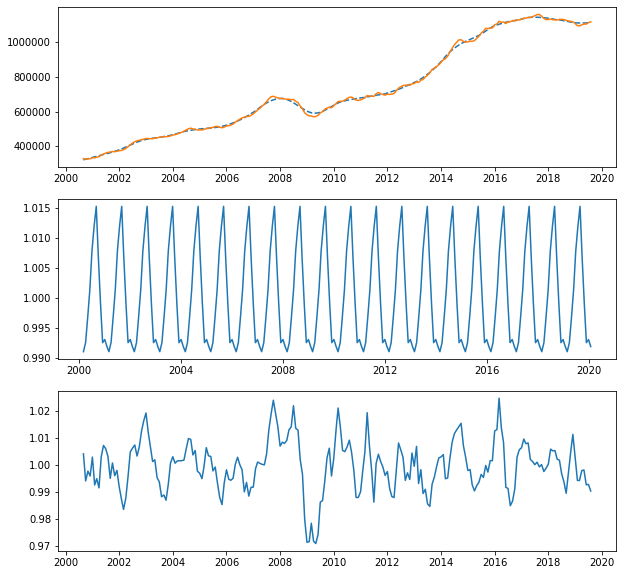

In [21]:
decomposition = seasonal_decompose(Property_Index1, model='multiplicative', freq=12)
#frequency is the number of data points relative to a year

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend*residual*seasonal, label='Original')

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')

plt.subplot(313)
plt.plot(residual, label='Randomness')

We can see from this decomposition analysis that the original data is made up of a general underlying trend, a seasonal component that repeats itself for each year (defined by freq=12), and a non-systematic residual component.

#### Testing for stationarity
This is required so that time series models can be contructed. If a time series is non-stationary then its distribution changes from time period to time period. With only one observation for each time period, it is difficult to see how one could make any inferences about the time series. It is like trying to hit a moving target knowing where it has been but with no knowledge of the direction it is moving in.

The data is non-stationary. We need to apply first order differencing.

This makes the data stationairy, i.e., we remove the trend. To confirm that the data is now statitionary we use the Dickey–Fuller_test to confirm that the data is indeed stationery after first order differencing. Dickey-Fuller test can figure out whether a time series is stationary around a mean or linear trend or is non-stationary. It will help figure out if the mean and variance are constant over time. The null hypothesis is that the data is stationary.

But before completing the Dickey–Fuller_test we need to split the data into train and test on a 75%/25% split

In [22]:
Property_Index1.iloc[228] # 240 data points multiplied by 75%

Inner London    1092235
Name: 2019-03-01 00:00:00, dtype: int32

In [23]:
Property_Index1.iloc[239] # to verify last entry

Inner London    1132823
Name: 2020-02-01 00:00:00, dtype: int32

In [24]:
# Spliting the data into train and test and then divide by 10,000 converting back to the indice values  
train = Property_Index1[:"2019-03"]*1/10000
test = Property_Index1["2019-04":]*1/10000

In [25]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

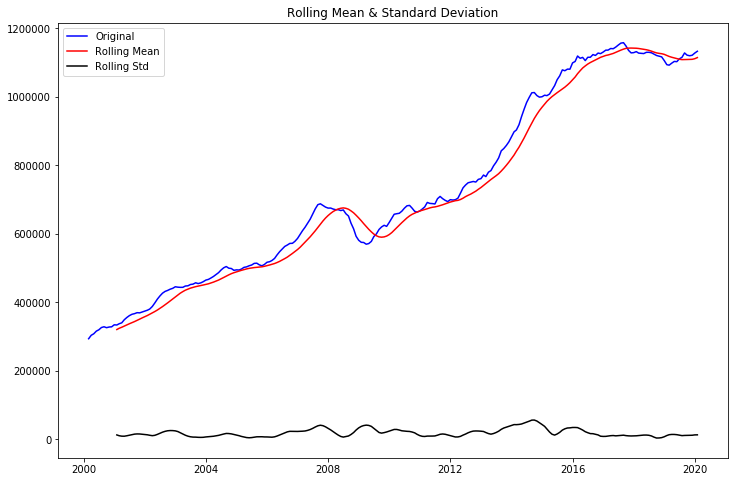

Results of Dickey-Fuller Test:
p-value = 0.9161. The series is likely non-stationary.
Test Statistic                  -0.362895
p-value                          0.916112
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


In [26]:
test_stationarity(Property_Index1['Inner London'])

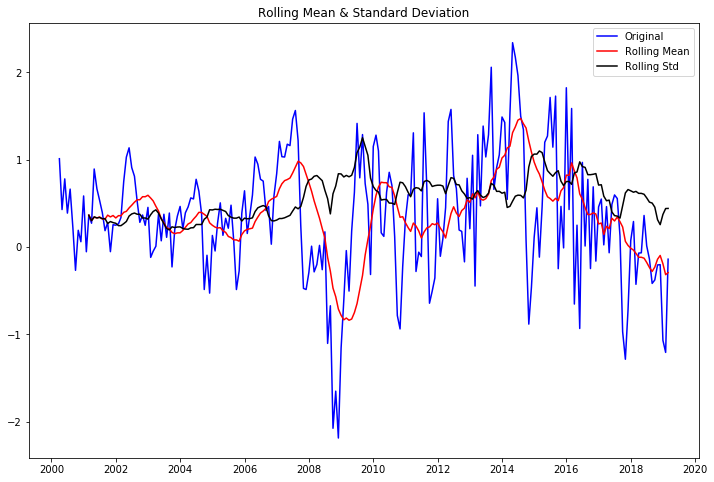

Results of Dickey-Fuller Test:
p-value = 0.0050. The series is likely stationary.
Test Statistic                  -3.644117
p-value                          0.004972
#Lags Used                      14.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


In [27]:
first_diff = train['Inner London'] - train['Inner London'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

In [28]:
diff = Property_Index1.diff(1).dropna()

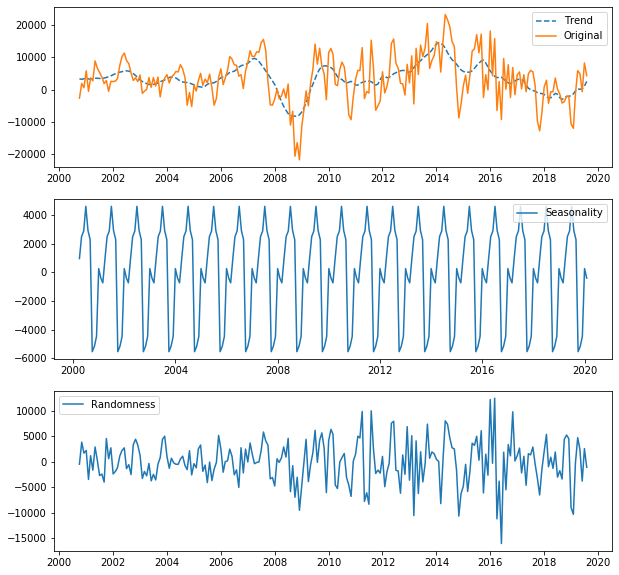

In [29]:
decomposition = seasonal_decompose(diff, model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend+residual+seasonal, label='Original')
plt.legend()

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(313)
plt.plot(residual, label='Randomness')
plt.legend()

From the above I can observe that the all components trend, seasonalty and randomness are significant due to variation of more than 1.

#### Identification of best fit ARIMA model
In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.

This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

#### 4.2. (Partial) Autocorrelation Function
How much is the data correlated with itself?

https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima

Last page of this document explains how to find the p- and q-parameters from the ACF and PACF. The combination of AR(p) and MA(q) can lead to slight changes in the parameters but this could be done by a gridsearch trying to minimise the AIC.

#### Akaike Information Critera
I need to find the parameters (p,d,q)


(0, 20)

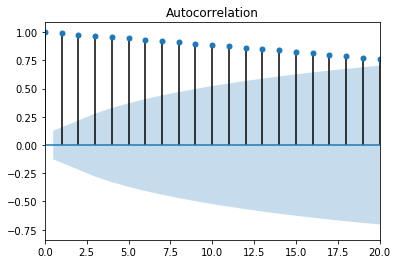

In [30]:
plot_acf(Property_Index1)
plt.xlim(0,20)

The data is non-stationary. Hence we had to apply first order differencing to make it stationairy, i.e., we remove the trend. As such the value of d=1

Now we move on to determine the best value of p and q

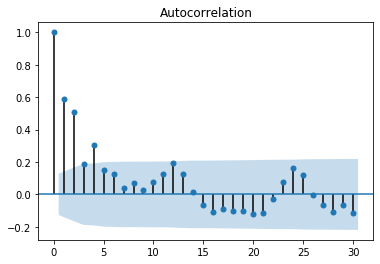

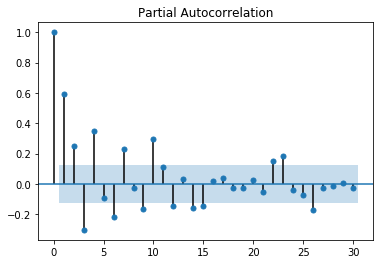

In [31]:
plot_acf(diff, lags=30)
plot_pacf(diff, lags=30)
plt.show()

In [32]:
resDiff = sm.tsa.arma_order_select_ic(Property_Index1, max_ar=3, max_ma=3, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (3, 3) is the best.


### 5. Create a time series model
We used the ARIMA and the Seasonal ARIMA models from the python package statsmodels. The ARIMA model consists of the variables , which are the non-seasonal AR order, differencing, and MA order, respectively. In order to fit this model to data, we use grid search from . To fit the ARIMA model we chose to either minimize the AIC, or the root mean square (RMS) value. The following code generates the grid that we will use to search the model space for the best fitting ARIMA model,
#### ARIMA (3, 1, 3)

In [33]:
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1,1,1,12), enforce_invertibility=False, enforce_stationarity=False)

In [34]:
results = model.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Inner London   No. Observations:                  229
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -123.018
Date:                              Fri, 24 Jul 2020   AIC                            264.036
Time:                                      02:54:07   BIC                            293.721
Sample:                                  03-01-2000   HQIC                           276.049
                                       - 03-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3656      0.190      1.924      0.054      -0.007       0.738
ar.L2          0.3895      0.074      5.246      0.000       0.244       0.535
ar.L3          0.0664      0.111      0.597      0.551      -0.152       0.284
ma.L1          0.4176      0.166      2.513      0.012       0.092       0.743
ma.L2          0.3850      0.181      2.123      0.034       0.030       0.740
ma.L3         -0.7367      0.199     -3.696      0.000      -1.127      -0.346
ar.S.L12      -0.0398      0.096     -0.414      0.679      -0.228       0.149
ma.S.L12      -1.0000    304.720     -0.003      0.997    -598.240     596.240
sigma2         0.1362     41.495      0.003      0.997     -81.192      81.465
===================================================================================
Ljung-Box (Q):                       33.61   Jarque-Bera (JB):                 8.63
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               4.42   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The results indicates that the moving average is not significant betweem from leg 1 to 3 as the P-values for theses leg are greater than 0.05. However 

### 6. Evaluate and diagnose a possible model

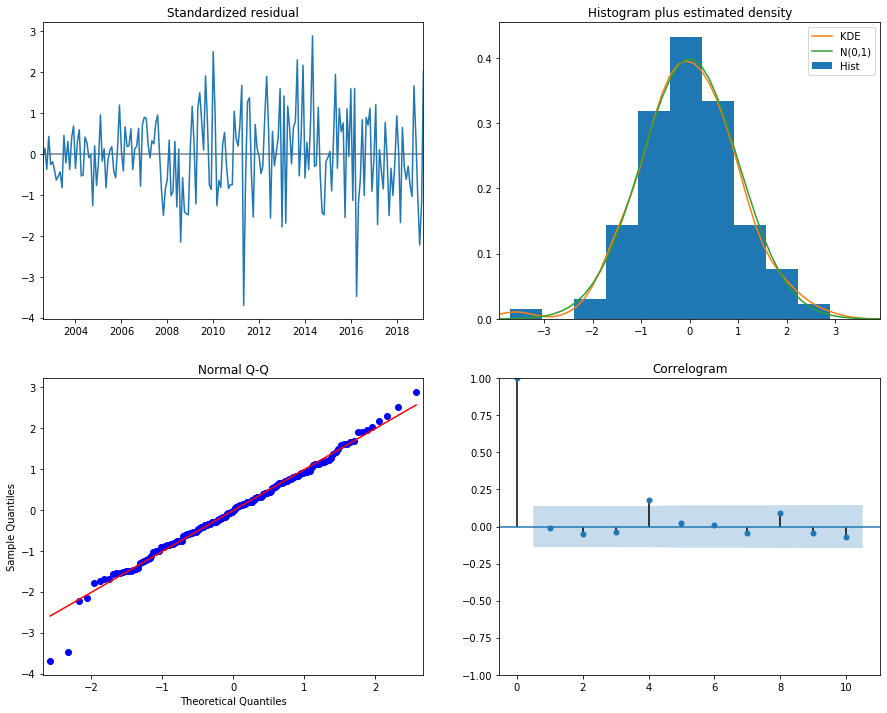

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

•	Top left: The residual errors appear to fluctuate around a mean of zero and have a uniform variance.

•	Top Right: The density plot suggest normal distribution with mean zero.

•	Bottom left: Dots perfectly falling in line with the red line indicate a normal distribution otherwise any significant deviations imply the distribution is skewed.  The plots indicate a slight skewness to the left.

•	Bottom Right: The Correlogram also known as ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So I might need to look for more X’s (predictors) to the model.

•	Overall, it seems to be a fair fit. Nonetheless, I will adjust the parameters to remove those that are not significant parameters.


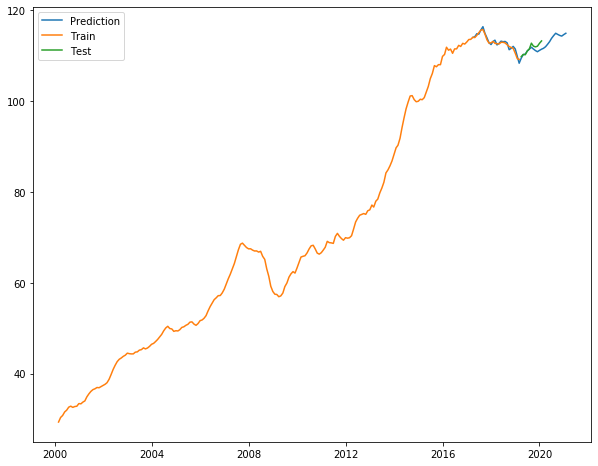

In [37]:
predict = results.predict(start= 205, end=251)
plt.figure(figsize=(10,8))
plt.figure(1)
plt.plot(predict, label='Prediction')
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.legend()

### 7. Improve the model

In [38]:
import pmdarima as pm
stepwise_model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=356.566, BIC=373.443, Time=1.622 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=574.943, BIC=581.694, Time=0.028 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=434.464, BIC=447.965, Time=0.229 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=427.535, BIC=441.036, Time=0.583 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=573.294, BIC=576.669, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=466.026, BIC=479.527, Time=0.117 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=358.515, BIC=378.767, Time=1.360 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

## ARIMA (2, 1, 2)

Best fit ARIMA parameters are as follows (2,1,2)x(0,1,1,12), we will now use these parameters to formulate an adjusted model

In [39]:
model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,1,12), enforce_invertibility=False, enforce_stationarity=False)

In [40]:
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Inner London   No. Observations:                  229
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -125.704
Date:                              Fri, 24 Jul 2020   AIC                            263.409
Time:                                      02:54:27   BIC                            283.228
Sample:                                  03-01-2000   HQIC                           271.429
                                       - 03-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2007      0.069     -2.908      0.004      -0.336      -0.065
ar.L2          0.2402      0.069      3.457      0.001       0.104       0.376
ma.L1          1.1034      0.047     23.717      0.000       1.012       1.195
ma.L2          1.1416      0.047     24.309      0.000       1.050       1.234
ma.S.L12      -1.0000    130.913     -0.008      0.994    -257.585     255.585
sigma2         0.1360     17.798      0.008      0.994     -34.748      35.020
===================================================================================
Ljung-Box (Q):                       41.24   Jarque-Bera (JB):                 9.59
Prob(Q):                              0.42   Prob(JB):                         0.01
Heteroskedasticity (H):               4.78   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Following revision of the parameters,  all remaining parameters except the seasonality are still statistcially signficant as per the results which show their p-values being below 0.05. Accordingly, I will now do a diagnostics plot to confirm fit of the model following revising the parameters.

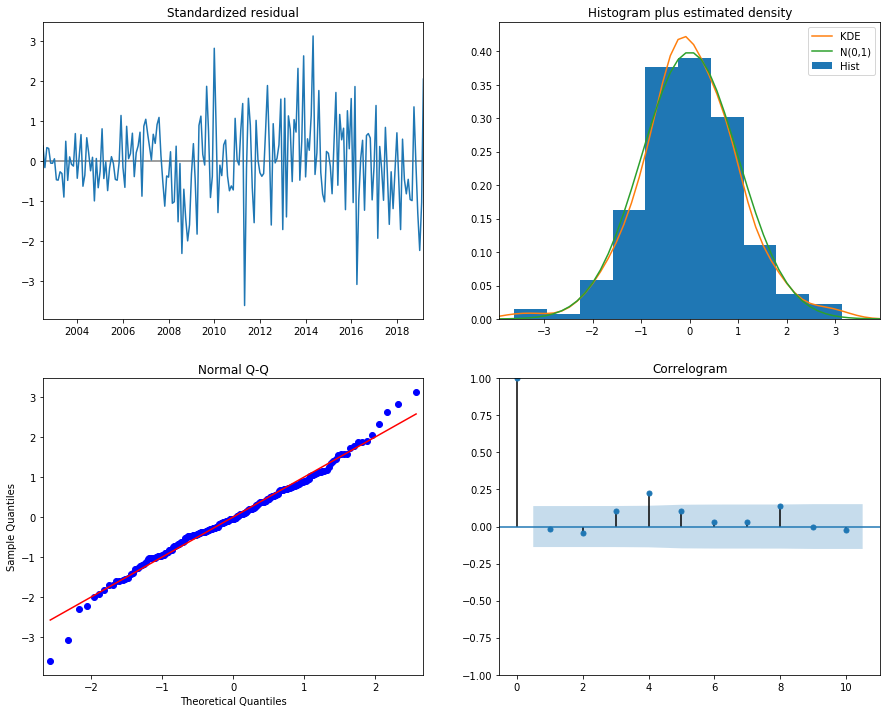

In [42]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Similar to the results in first model the overall seem to be a fair fit. We will use the outcome to forecast the property price index changes.

In [43]:
predict = results.predict(start= 205, end=251)

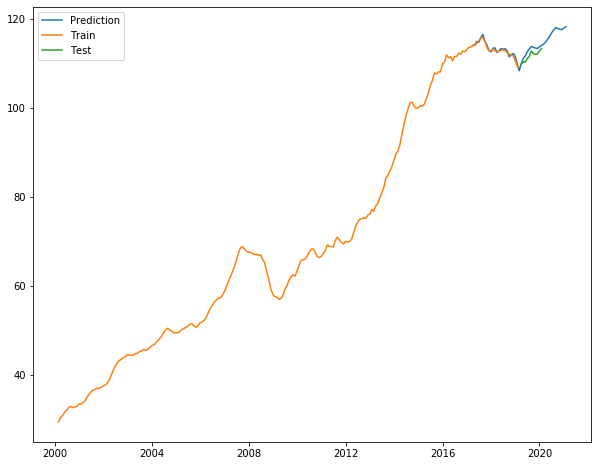

In [44]:
plt.figure(figsize=(10,8))
plt.figure(1)
plt.plot(predict, label='Prediction')
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.legend()

In [45]:
predict

2017-04-01    113.926547
2017-05-01    114.097176
2017-06-01    114.931960
2017-07-01    114.736816
2017-08-01    115.785293
2017-09-01    116.469744
2017-10-01    114.928962
2017-11-01    114.043000
2017-12-01    112.911309
2018-01-01    112.571914
2018-02-01    113.398211
2018-03-01    113.485985
2018-04-01    112.435489
2018-05-01    112.807432
2018-06-01    113.322704
2018-07-01    113.178144
2018-08-01    113.259189
2018-09-01    112.853054
2018-10-01    111.459442
2018-11-01    111.865487
2018-12-01    112.202983
2019-01-01    111.537749
2019-02-01    109.811244
2019-03-01    108.335326
2019-04-01    109.840916
2019-05-01    111.068238
2019-06-01    111.655813
2019-07-01    112.610014
2019-08-01    113.204890
2019-09-01    113.815435
2019-10-01    113.586162
2019-11-01    113.435399
2019-12-01    113.324822
2020-01-01    113.701356
2020-02-01    114.002554
2020-03-01    114.278161
2020-04-01    114.733227
2020-05-01    115.356268
2020-06-01    116.026114
2020-07-01    116.818683


### Conclusion 

The time series forecast provide a basis for estimating the expected price movement in the next 12 months to assess impact exposure of the loan book to the property prices changes and identify the clients that might be vulnerable to such movement and may face margin top-up due to a shortfall in collateral or end up with negative equity. While the model provides a good benchmark for the property price changes, I should give due consideration to factors that cannot be effectively incorporated into the model. These includes extreme prices shocks due to thinks such as the corona virus pandemic. Nonetheless, I could consider other elements to improve the model performances as part process to operationalise it. Specifically, I would also consider other techniques to increase performance, which is are as follows:

(1)	Using different models for different time horizons

(2)	Combining multiple forecasts (e.g. considering the average prediction)

(3)	Bootstrap Aggregating an ensemble meta-algorithm which creates multiple versions of learning set to produce multiple numbers of predictions. These predictions are then aggregated, for example by arithmetic mean.